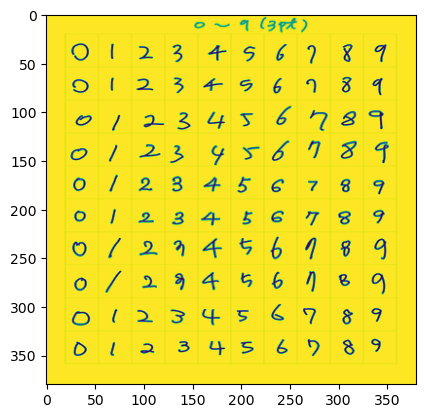

380 380
(100, 28, 28) float64
24 52 20 48
24 52 55 83
24 52 90 118
24 52 125 153
24 52 160 188
24 52 195 223
24 52 230 258
24 52 265 293
24 52 300 328
24 52 335 363
59 87 20 48
59 87 55 83
59 87 90 118
59 87 125 153
59 87 160 188
59 87 195 223
59 87 230 258
59 87 265 293
59 87 300 328
59 87 335 363
94 122 20 48
94 122 55 83
94 122 90 118
94 122 125 153
94 122 160 188
94 122 195 223
94 122 230 258
94 122 265 293
94 122 300 328
94 122 335 363
129 157 20 48
129 157 55 83
129 157 90 118
129 157 125 153
129 157 160 188
129 157 195 223
129 157 230 258
129 157 265 293
129 157 300 328
129 157 335 363
164 192 20 48
164 192 55 83
164 192 90 118
164 192 125 153
164 192 160 188
164 192 195 223
164 192 230 258
164 192 265 293
164 192 300 328
164 192 335 363
199 227 20 48
199 227 55 83
199 227 90 118
199 227 125 153
199 227 160 188
199 227 195 223
199 227 230 258
199 227 265 293
199 227 300 328
199 227 335 363
234 262 20 48
234 262 55 83
234 262 90 118
234 262 125 153
234 262 160 188
234 262 195 223

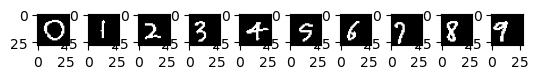

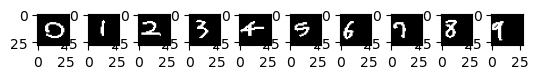

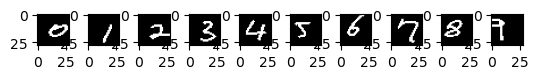

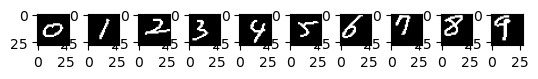

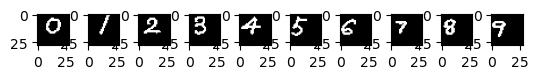

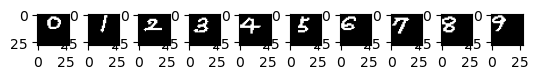

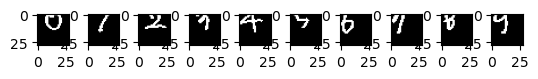

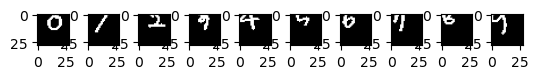

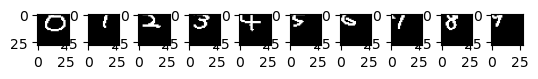

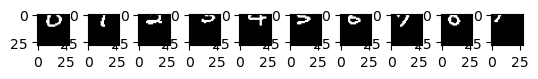

In [23]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

###### parameter #######

# 이미지는 mnist_handmade_dataset folder에 저장. 이미지 파일 이름은 1.jpeg, 2.jpeg, ...
num_c=10 # 문자 column 수
num_r=10 # 문자 row 수
n_image=1 # 한번에 처리할 이미지 파일 수.
# image file name: 0.jpeg, 1.jpeg, ...
for k in range(1,n_image+1):
    image_path = 'mnist_handmade_dataset/%d.jpg' %k # 이미지 저장 폴더와 이미지 파일 이름 지정
#    print(image_path)
    skip_region=46

    #스캔한 이미지의 숫자 라벨들 . 기호의 경우 아래를 적절한 기호로 변경
    labels=[0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9,
    0,1,2,3,4,5,6,7,8,9]

    row_s= 24 #180 # row start : 이미지별 조정 필요
#    row_e = -140 # row end
    col_s= 20 #160 # column start : 이미지별 조정 필요
#    col_e = -146 # column end
    gap1 = [7,7,7,7,7,7,7,7,7,7] #15  경계선 건너뛰기: 이미지별 조정 필요
    gap2 = [7,7,7,7,7,7,7,7,7,7]
    square_width = 28 #220
    square_height = 28 #315

    img=cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#    cv2.cvtColor(img, img, cv2.COLOR_BGR2GRAY)
#rorate image
    plt.imshow(img)
    plt.show()
#    (h, w) = img.shape[:2]
#    center = (w / 2, h / 2)
    
#    M = cv2.getRotationMatrix2D(center, 1.65, 1)
#    img = cv2.warpAffine(img, M, (w, h))
    
#    plt.imshow(img)
#    plt.show()

    img=(255-img)



    img_row,img_col=img.shape
    print(img_row, img_col)

    img_cl=cv2.adaptiveThreshold(img,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
    cv2.THRESH_BINARY,61, -35)


    img=img_cl

    ####### crop, resize image #####


#    img1=np.zeros((num_c*num_r,square_height-gap*2,square_width-gap*2))
    img2=np.zeros((num_c*num_r,28,28))
    print(img2.shape, img2.dtype)
    # 스캔한 이미지를 각각의 숫자 별로 자릅니다.
    row_start=row_s
    row_end=row_start-gap1[0]
    
    for i in range(num_r):
        row_start = row_end+gap1[i] #((square_height)*(i))+gap
        row_end = row_start+ square_height #(square_height*(i+1))-gap
        colum_start=col_s
        colum_end=colum_start-gap2[0]
        for j in range(num_c):
            colum_start = colum_end+ gap2[j] #(square_width*(j))+gap)
            colum_end = colum_start+square_width #(square_width*(j+1))-gap)
            print (row_start, row_end, colum_start, colum_end)
#            img1[i*num_r+j]=img[row_start: row_end, colum_start: colum_end]
#            img2[i*num_r+j] = cv2.resize(img1[i*num_r+j], (28, 28), interpolation=cv2.INTER_AREA)
            img2[i*num_r+j]=img[row_start:row_end,colum_start:colum_end]

    print(k)
##### plot  resize

    for i in range(num_r):
        for j in range(num_c):
            plt.subplot(10, 10, j+1)
            plt.imshow(img2[i*num_c+j],cmap='gray')#, interpolation='nearest')

        plt.show()
        
    
    if k==1:
        img4=img2
        labels_3=labels
    else:
        img4=np.concatenate((img4, img2), axis=0)
        labels_3=np.concatenate((labels_3, labels), axis=0)
        print(img4.shape)

In [ ]:
print(img4.shape, img4.dtype)
img=img4
label=labels_3
print(img.shape, img.dtype, label.shape, label.dtype)
# 저장 파일 이름 지정
np.savez_compressed('mnist_20220930_1.npz', img=img4, label=labels_3)
mnist_a=np.load('mnist_20220930_1.npz')
print(mnist_a['img'].shape, mnist_a['img'].dtype, mnist_a['label'].shape, mnist_a['label'].dtype)

In [ ]:
num_c=10
num_r=10
n_image=4
img=mnist_a['img']
label=mnist_a['label']
for k in range(1,n_image+1):
    print(k)
    for i in range(num_r):
        print(label[(k-1)*num_r*num_c+i*num_r:(k-1)*num_r*num_c+(i+1)*num_r])
        for j in range(num_c):
            
            plt.subplot(10, 10, j+1)
            plt.imshow(img[i*num_c+j],cmap='gray')#, interpolation='nearest')

        plt.show()

In [21]:
n = np.full(7,10)
n[2]

10